# Результат работы серверов

Немного про названия файлов:

* block - блокирующая архитектура;
* nblock - блокирующая архитектура;
* async - блокирующая архитектура.

Следующая буква - параметр, который меняется:
* n - количество элементов в массиве;
* m - количество клиентов;
* d - время ожидания между запросами.

Следующие три числа - значения в пределах которого меняется значение:
1. стартовое значение;
2. конечное значение;
3. шаг.

Затем объявлен x - количество отправленных сообщений от одного клиента.

Затем постоянные параметры (один из них не имеет смысла, так как он меняется):
1. n - количество элементов в массиве;
2. m - количество клиентов;
3. d - время ожидания между запросами.

И в конце обозначено то, как измеряется время:
* s - время измеряется на сервере
* с - время измеряется у клиента

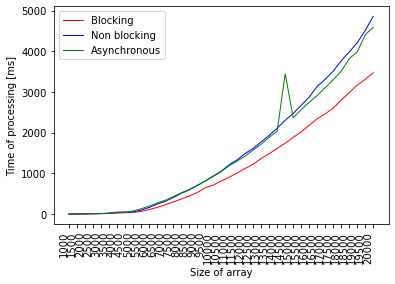

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

df = pd.read_csv('src/main/java/csv/block_n_1000_20000_500_50_20_20_200_s.csv')
df2 = pd.read_csv('src/main/java/csv/nblock_n_1000_20000_500_50_20_20_200_s.csv')
df3 = pd.read_csv('src/main/java/csv/async_n_1000_20000_500_50_20_20_200_s.csv')
new_df = pd.concat([df, df2, df3])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.iloc[0], color='red', linewidth=1., label='Blocking')
ax.plot(new_df.iloc[1], color='blue', linewidth=1., label='Non blocking')
ax.plot(new_df.iloc[2], color='green', linewidth=1., label='Asynchronous')
ax.set_xlabel('Size of array')
ax.set_ylabel('Time of processing [ms]')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

x = 50

m = 20

delta = 200

Измеряется время на сервере

Здесь видна квадратичная зависимость входных данных от количества элементов, что достаточно логично, так как на сервере используется квадратичная сортировка. Возможно в блокирующей архитектуре не было частого переключения потоков, поэтому она быстрее двух оставшихся.

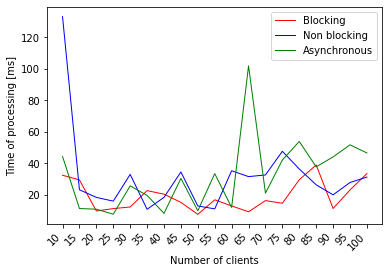

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

df = pd.read_csv('src/main/java/csv/block_m_10_100_5_2_2000_20_2000_c.csv')
df2 = pd.read_csv('src/main/java/csv/nblock_m_10_100_5_2_2000_20_2000_c.csv')
df3 = pd.read_csv('src/main/java/csv/async_m_10_100_5_2_2000_20_2000_c.csv')
new_df = pd.concat([df, df2, df3])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.iloc[0], color='red', linewidth=1., label='Blocking')
ax.plot(new_df.iloc[1], color='blue', linewidth=1., label='Non blocking')
ax.plot(new_df.iloc[2], color='green', linewidth=1., label='Asynchronous')
ax.set_xlabel('Number of clients')
ax.set_ylabel('Time of processing [ms]')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

x = 5

n = 2000

delta = 2000

Измеряется время у клиентов

Здесь сложно понять конкретную тенденцию, но в среднем время обработки сообщения увеличивается с количеством клиентов, что довольно логично, так как они посылают больше задач, что замедляет работу сервера.

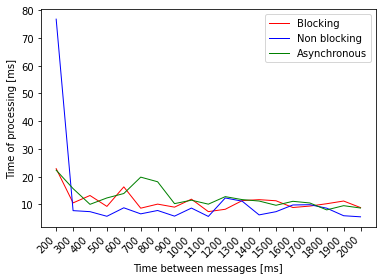

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

df = pd.read_csv('src/main/java/csv/block_d_200_2000_100_5_2000_20_200_s.csv')
df2 = pd.read_csv('src/main/java/csv/nblock_d_200_2000_100_5_2000_20_200_s.csv')
df3 = pd.read_csv('src/main/java/csv/async_d_200_2000_100_5_2000_20_200_s.csv')
new_df = pd.concat([df, df2, df3])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.iloc[0], color='red', linewidth=1., label='Blocking')
ax.plot(new_df.iloc[1], color='blue', linewidth=1., label='Non blocking')
ax.plot(new_df.iloc[2], color='green', linewidth=1., label='Asynchronous')
ax.set_xlabel('Time between messages [ms]')
ax.set_ylabel('Time of processing [ms]')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

x = 50

n = 2000

m = 20

Измеряется время на сервере

Здесь можно заметить, что с увеличением времени между сообщениями время обработки уменьшается, так как уменьшается нагрузка на сервер, так как меньше задач одновременно обрабатываются на сервере.